In [53]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy.random as nr
from scipy.spatial import distance_matrix

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [14]:
input_1819 = "C:\\Users\\rotol\\Downloads\\csvs\\contracts_reduced_1819.csv"
input_2021 = "C:\\Users\\rotol\\Downloads\\csvs\\contracts_reduced_2021.csv"

In [15]:
contract_1819 = pd.read_csv(input_1819)
contract_1819

,Component 1,Component 2
0,-1.001709,1.026506
1,-0.015776,0.402829
2,1.842884,0.817422
3,-0.667100,1.853403
4,1.399473,4.121612
...,...,...
2596291,-0.337927,-1.167661
2596292,-0.076277,1.188110
2596293,-0.148994,1.139007
2596294,0.088315,0.785527


In [16]:
def kmeansElbow(X,range_n_clusters):
# Create all possible cluster solutions with a loop
    wcss = []
    for n_clusters in range_n_clusters:

        # Cluster solution with i clusters
        kmeans = KMeans(n_clusters= n_clusters)
        # Fit the data
        kmeans.fit(X)
        # Find WCSS for the current iteration (inertia measure)
        wcss_iter = kmeans.inertia_
        # Append the value to the WCSS list
        wcss.append(wcss_iter)

    
    return wcss

Text(0, 0.5, 'Within-cluster Sum of Squares')

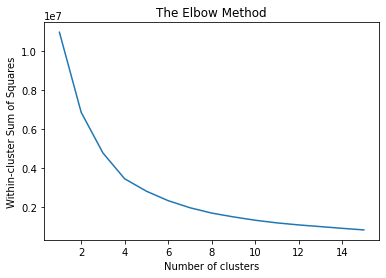

In [17]:
wcss = kmeansElbow(contract_1819, range(1,16))


number_clusters = range(1,16)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [33]:
model_1819 = KMeans(n_clusters=4)
labels = model_1819.fit_predict(contract_1819)
centroids = model_1819.cluster_centers_
centroids

array([[ 2.33602185, -0.99359645],
       [-0.85735415,  0.77798281],
       [ 2.17109688,  2.51405439],
       [-0.47470586, -1.06009239]])

In [34]:
contract_1819_labelled = pd.concat([contract_1819, pd.DataFrame(labels)], axis = 1)
contract_1819_labelled=contract_1819_labelled.rename(columns={0:"Label"})
contract_1819_labelled

,Component 1,Component 2,Label
0,-1.001709,1.026506,1
1,-0.015776,0.402829,1
2,1.842884,0.817422,2
3,-0.667100,1.853403,1
4,1.399473,4.121612,2
...,...,...,...
2596291,-0.337927,-1.167661,3
2596292,-0.076277,1.188110,1
2596293,-0.148994,1.139007,1
2596294,0.088315,0.785527,1


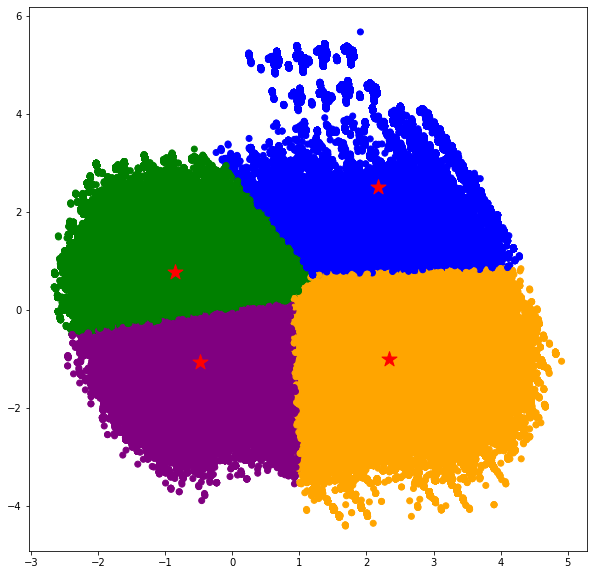

In [35]:
#Plot the labelled data
fig = plt.figure(figsize=(10,10))
colors = ['orange','green','blue','purple']
plt.scatter(contract_1819_labelled['Component 1'], contract_1819_labelled['Component 2'], c=contract_1819_labelled['Label'], cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
plt.show()

In [44]:
#check position of centroids
#find minimum distance from centroids
dist_mat = pd.DataFrame(distance_matrix(contract_1819.values, centroids))
ctr = 0
bestC0 = 0
current = 99999
for i in dist_mat[0]:
    if i < current:
        current = i
        bestC0 = ctr
    ctr = ctr+1
    
ctr = 0
bestC1 = 0
current = 99999
for i in dist_mat[1]:
    if i < current:
        current = i
        bestC1 = ctr
    ctr = ctr+1
    
ctr = 0
bestC2 = 0
current = 99999
for i in dist_mat[2]:
    if i < current:
        current = i
        bestC2 = ctr
    ctr = ctr+1
    
ctr = 0
bestC3 = 0
current = 99999
for i in dist_mat[3]:
    if i < current:
        current = i
        bestC3 = ctr
    ctr = ctr+1

In [45]:
print('Distance of the closest element to the centroid (0)', dist_mat[0].min())
print('Distance of the closest element to the centroid (1)', dist_mat[1].min())
print('Distance of the closest element to the centroid (2)', dist_mat[2].min())
print('Distance of the closest element to the centroid (3)', dist_mat[3].min())

Distance of the closest element to the centroid (0) 0.014345501198678967
Distance of the closest element to the centroid (1) 0.0036922372259488487
Distance of the closest element to the centroid (2) 0.018814226262406957
Distance of the closest element to the centroid (3) 0.0012977065389185298


In [49]:
cc_1819 = pd.read_csv("C:\\Users\\rotol\\Downloads\\csvs\\contracts_1819.csv")
cent0 = cc_1819.iloc[bestC0]
cent1 = cc_1819.iloc[bestC1]
cent2 = cc_1819.iloc[bestC2]
cent3 = cc_1819.iloc[bestC3]

In [50]:
cc_1819 = pd.concat([cc_1819,pd.DataFrame(labels)], axis=1)
cc_1819 = cc_1819.rename(columns={0:"Label"})
cc_1819

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA,Label
0,M,25-49,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO,1
1,F,50-64,Confezioni di abbigliamento sportivo o di altr...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIANO,1
2,F,25-49,Istruzione di grado preparatorio: scuole dell'...,ISTRUZIONE TERZIARIA,LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIANO,2
3,M,50-64,Allevamento di bovini e bufalini da carne,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE MISTO,BERGAMO,STRANIERO,1
4,F,25-49,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,ITALIANO,2
...,...,...,...,...,...,...,...,...,...
2596291,F,25-49,Altre attività di assistenza sociale non resid...,ISTRUZIONE TERZIARIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MONZA E BRIANZA,ITALIANO,3
2596292,F,25-49,Mense,ISTRUZIONE SECONDARIA SUPERIORE CON ACCESSO A ...,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,STRANIERO,1
2596293,F,50-64,Installazione di altre macchine ed apparecchia...,LICENZA ELEMENTARE,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIANO,1
2596294,F,50-64,Mense,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIANO,1


In [60]:
cc_18191 = cc_1819[(cc_1819.Label == 0)]['GENERE'].value_counts()
cc_18192 =  cc_1819[(cc_1819.Label == 1)]['GENERE'].value_counts()
cc_18193 =  cc_1819[(cc_1819.Label == 2)]['GENERE'].value_counts()
cc_18194 =  cc_1819[(cc_1819.Label == 3)]['GENERE'].value_counts()

fig = make_subplots(rows=2, cols=2,subplot_titles=("Label 0","Label 1","Label 2","Label 3"),
                    specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(values = cc_18191.values, labels = cc_18191.index, hole=0.7),
    row=1, col=1
)

fig.add_trace(
    go.Pie(values = cc_18192.values, labels = cc_18192.index, hole=0.7),
    row=1, col=2
)

fig.add_trace(
    go.Pie(values = cc_18193.values, labels = cc_18193.index, hole=0.7),
    row=2, col=1
)

fig.add_trace(
    go.Pie(values = cc_18194.values, labels = cc_18194.index, hole=0.7),
    row=2, col=2
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

In [61]:
cc_18191 = cc_1819[(cc_1819.Label == 0)]['CITTADINANZA'].value_counts()
cc_18192 =  cc_1819[(cc_1819.Label == 1)]['CITTADINANZA'].value_counts()
cc_18193 =  cc_1819[(cc_1819.Label == 2)]['CITTADINANZA'].value_counts()
cc_18194 =  cc_1819[(cc_1819.Label == 3)]['CITTADINANZA'].value_counts()

fig = make_subplots(rows=2, cols=2,subplot_titles=("Label 0","Label 1","Label 2","Label 3"),
                    specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(values = cc_18191.values, labels = cc_18191.index, hole=0.7),
    row=1, col=1
)

fig.add_trace(
    go.Pie(values = cc_18192.values, labels = cc_18192.index, hole=0.7),
    row=1, col=2
)

fig.add_trace(
    go.Pie(values = cc_18193.values, labels = cc_18193.index, hole=0.7),
    row=2, col=1
)

fig.add_trace(
    go.Pie(values = cc_18194.values, labels = cc_18194.index, hole=0.7),
    row=2, col=2
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

In [66]:
cc_18191 = cc_1819[(cc_1819.Label == 0)]['ETA'].value_counts()
cc_18191 = cc_18191.reindex(index=['NON DEFINITO','15-24','25-49','50-64',"65 o piu'"])

cc_18192 =  cc_1819[(cc_1819.Label == 1)]['ETA'].value_counts()
cc_18192 = cc_18192.reindex(index=['NON DEFINITO','15-24','25-49','50-64',"65 o piu'"])

cc_18193 =  cc_1819[(cc_1819.Label == 2)]['ETA'].value_counts()
cc_18193 = cc_18193.reindex(index=['NON DEFINITO','15-24','25-49','50-64',"65 o piu'"])

cc_18194 =  cc_1819[(cc_1819.Label == 3)]['ETA'].value_counts()
cc_18194 = cc_18194.reindex(index=['NON DEFINITO','15-24','25-49','50-64',"65 o piu'"])

fig = make_subplots(rows=2, cols=2,subplot_titles=("Label 0","Label 1","Label 2","Label 3"),
                    specs=[[{"type": "bar"}, {"type": "bar"}],[{"type": "bar"}, {"type": "bar"}]])

fig.add_trace(
    go.Bar(y = cc_18191.values, x = cc_18191.index),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y = cc_18192.values, x = cc_18192.index),
    row=1, col=2
)

fig.add_trace(
    go.Bar(y = cc_18193.values, x = cc_18193.index),
    row=2, col=1
)

fig.add_trace(
    go.Bar(y = cc_18194.values, x = cc_18194.index),
    row=2, col=2
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots", showlegend=False)
fig.show()

In [68]:
cc_18191 = cc_1819[(cc_1819.Label == 0)]['TITOLOSTUDIO'].value_counts()
cc_18191 = cc_18191.reindex(index=['NESSUN TITOLO DI STUDIO',
                                   'LICENZA ELEMENTARE',
                                   'LICENZA MEDIA',
                                   "ISTRUZIONE SECONDARIA SUPERIORE SENZA ACCESSO A UNIVERSITA'",
                                   "ISTRUZIONE SECONDARIA SUPERIORE CON ACCESSO A UNIVERSITA'",
                                   "ISTRUZIONE TERZIARIA",
                                   "ISTRUZIONE POST-LAUREAM"])

cc_18192 =  cc_1819[(cc_1819.Label == 1)]['TITOLOSTUDIO'].value_counts()
cc_18192 = cc_18192.reindex(index=['NESSUN TITOLO DI STUDIO',
                                   'LICENZA ELEMENTARE',
                                   'LICENZA MEDIA',
                                   "ISTRUZIONE SECONDARIA SUPERIORE SENZA ACCESSO A UNIVERSITA'",
                                   "ISTRUZIONE SECONDARIA SUPERIORE CON ACCESSO A UNIVERSITA'",
                                   "ISTRUZIONE TERZIARIA",
                                   "ISTRUZIONE POST-LAUREAM"])

cc_18193 =  cc_1819[(cc_1819.Label == 2)]['TITOLOSTUDIO'].value_counts()
cc_18193 = cc_18193.reindex(index=['NESSUN TITOLO DI STUDIO',
                                   'LICENZA ELEMENTARE',
                                   'LICENZA MEDIA',
                                   "ISTRUZIONE SECONDARIA SUPERIORE SENZA ACCESSO A UNIVERSITA'",
                                   "ISTRUZIONE SECONDARIA SUPERIORE CON ACCESSO A UNIVERSITA'",
                                   "ISTRUZIONE TERZIARIA",
                                   "ISTRUZIONE POST-LAUREAM"])

cc_18194 =  cc_1819[(cc_1819.Label == 3)]['TITOLOSTUDIO'].value_counts()
cc_18194 = cc_18194.reindex(index=['NESSUN TITOLO DI STUDIO',
                                   'LICENZA ELEMENTARE',
                                   'LICENZA MEDIA',
                                   "ISTRUZIONE SECONDARIA SUPERIORE SENZA ACCESSO A UNIVERSITA'",
                                   "ISTRUZIONE SECONDARIA SUPERIORE CON ACCESSO A UNIVERSITA'",
                                   "ISTRUZIONE TERZIARIA",
                                   "ISTRUZIONE POST-LAUREAM"])


fig = make_subplots(rows=2, cols=2,subplot_titles=("Label 0","Label 1","Label 2","Label 3"),
                    specs=[[{"type": "bar"}, {"type": "bar"}],[{"type": "bar"}, {"type": "bar"}]])

fig.add_trace(
    go.Bar(y = cc_18191.values, x = ['NO TITOLO','ELEMENTARE','MEDIA',"SECONDARIA SUPERIORE NO UNIVERSITA'",
                                              "SECONDARIA SUPERIORE SI UNIVERSITA'",'TERZIARIA','POST-LAUREAM']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y = cc_18192.values, x = ['NO TITOLO','ELEMENTARE','MEDIA',"SECONDARIA SUPERIORE NO UNIVERSITA'",
                                              "SECONDARIA SUPERIORE SI UNIVERSITA'",'TERZIARIA','POST-LAUREAM']),
    row=1, col=2
)

fig.add_trace(
    go.Bar(y = cc_18193.values, x = ['NO TITOLO','ELEMENTARE','MEDIA',"SECONDARIA SUPERIORE NO UNIVERSITA'",
                                              "SECONDARIA SUPERIORE SI UNIVERSITA'",'TERZIARIA','POST-LAUREAM']),
    row=2, col=1
)

fig.add_trace(
    go.Bar(y = cc_18194.values, x = ['NO TITOLO','ELEMENTARE','MEDIA',"SECONDARIA SUPERIORE NO UNIVERSITA'",
                                              "SECONDARIA SUPERIORE SI UNIVERSITA'",'TERZIARIA','POST-LAUREAM']),
    row=2, col=2
)

fig.update_layout(height=1000, width=800, title_text="Side By Side Subplots", showlegend=False)
fig.show()

In [69]:
cc_18191 = cc_1819[(cc_1819.Label == 0)]['PROVINCIAIMPRESA'].value_counts()
cc_18191 = cc_18191.reindex(index=['BERGAMO','LECCO','BRESCIA','COMO','LODI','MANTOVA',
                                   'CREMONA','PAVIA','MILANO','VARESE','SONDRIO','MONZA E BRIANZA'])

cc_18192 =  cc_1819[(cc_1819.Label == 1)]['PROVINCIAIMPRESA'].value_counts()
cc_18192 = cc_18192.reindex(index=['BERGAMO','LECCO','BRESCIA','COMO','LODI','MANTOVA',
                                   'CREMONA','PAVIA','MILANO','VARESE','SONDRIO','MONZA E BRIANZA'])

cc_18193 =  cc_1819[(cc_1819.Label == 2)]['PROVINCIAIMPRESA'].value_counts()
cc_18193 = cc_18193.reindex(index=['BERGAMO','LECCO','BRESCIA','COMO','LODI','MANTOVA',
                                   'CREMONA','PAVIA','MILANO','VARESE','SONDRIO','MONZA E BRIANZA'])

cc_18194 =  cc_1819[(cc_1819.Label == 3)]['PROVINCIAIMPRESA'].value_counts()
cc_18194 = cc_18194.reindex(index=['BERGAMO','LECCO','BRESCIA','COMO','LODI','MANTOVA',
                                   'CREMONA','PAVIA','MILANO','VARESE','SONDRIO','MONZA E BRIANZA'])


fig = make_subplots(rows=2, cols=2,subplot_titles=("Label 0","Label 1","Label 2","Label 3"),
                    specs=[[{"type": "bar"}, {"type": "bar"}],[{"type": "bar"}, {"type": "bar"}]])

fig.add_trace(
    go.Bar(y = cc_18191.values, x = cc_18191.index),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y = cc_18192.values, x = cc_18192.index),
    row=1, col=2
)

fig.add_trace(
    go.Bar(y = cc_18193.values, x = cc_18193.index),
    row=2, col=1
)

fig.add_trace(
    go.Bar(y = cc_18194.values, x = cc_18194.index),
    row=2, col=2
)

fig.update_layout(height=1000, width=800, title_text="Side By Side Subplots", showlegend=False)
fig.show()

In [70]:
cc_18191 = cc_1819[(cc_1819.Label == 0)]['MODALITALAVORO'].value_counts()
cc_18191 = cc_18191.reindex(index=['NON DEFINITO','TEMPO PARZIALE VERTICALE',
                                   'TEMPO PARZIALE ORIZZONTALE','TEMPO PARZIALE MISTO','TEMPO PIENO'])

cc_18192 =  cc_1819[(cc_1819.Label == 1)]['MODALITALAVORO'].value_counts()
cc_18192 = cc_18192.reindex(index=['NON DEFINITO','TEMPO PARZIALE VERTICALE',
                                   'TEMPO PARZIALE ORIZZONTALE','TEMPO PARZIALE MISTO','TEMPO PIENO'])

cc_18193 =  cc_1819[(cc_1819.Label == 2)]['MODALITALAVORO'].value_counts()
cc_18193 = cc_18193.reindex(index=['NON DEFINITO','TEMPO PARZIALE VERTICALE',
                                   'TEMPO PARZIALE ORIZZONTALE','TEMPO PARZIALE MISTO','TEMPO PIENO'])

cc_18194 =  cc_1819[(cc_1819.Label == 3)]['MODALITALAVORO'].value_counts()
cc_18194 = cc_18194.reindex(index=['NON DEFINITO','TEMPO PARZIALE VERTICALE',
                                   'TEMPO PARZIALE ORIZZONTALE','TEMPO PARZIALE MISTO','TEMPO PIENO'])


fig = make_subplots(rows=2, cols=2,subplot_titles=("Label 0","Label 1","Label 2","Label 3"),
                    specs=[[{"type": "bar"}, {"type": "bar"}],[{"type": "bar"}, {"type": "bar"}]])

fig.add_trace(
    go.Bar(y = cc_18191.values, x = cc_18191.index),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y = cc_18192.values, x = cc_18192.index),
    row=1, col=2
)

fig.add_trace(
    go.Bar(y = cc_18193.values, x = cc_18193.index),
    row=2, col=1
)

fig.add_trace(
    go.Bar(y = cc_18194.values, x = cc_18194.index),
    row=2, col=2
)

fig.update_layout(height=1000, width=800, title_text="Side By Side Subplots", showlegend=False)
fig.show()

In [82]:
cc_18191 = cc_1819[(cc_1819.Label == 0)]['SETTOREECONOMICODETTAGLIO'].value_counts()
cc_18191 = pd.Series(cc_18191[0:10])

cc_18192 =  cc_1819[(cc_1819.Label == 1)]['SETTOREECONOMICODETTAGLIO'].value_counts()
cc_18192 = pd.Series(cc_18192[0:10])

cc_18193 =  cc_1819[(cc_1819.Label == 2)]['SETTOREECONOMICODETTAGLIO'].value_counts()
cc_18193 = pd.Series(cc_18193[0:10])

cc_18194 =  cc_1819[(cc_1819.Label == 3)]['SETTOREECONOMICODETTAGLIO'].value_counts()
cc_18194 = pd.Series(cc_18194[0:10])


fig = make_subplots(rows=2, cols=2,subplot_titles=("Label 0","Label 1","Label 2","Label 3"),
                    specs=[[{"type": "bar"}, {"type": "bar"}],[{"type": "bar"}, {"type": "bar"}]])

fig.add_trace(
    go.Bar(y = cc_18191.values, x = cc_18191.index),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y = cc_18192.values, x = cc_18192.index),
    row=1, col=2
)

fig.add_trace(
    go.Bar(y = cc_18193.values, x = cc_18193.index),
    row=2, col=1
)

fig.add_trace(
    go.Bar(y = cc_18194.values, x = cc_18194.index),
    row=2, col=2
)

fig.update_xaxes(showticklabels=False)
fig.update_layout(height=1000, width=1000, title_text="Side By Side Subplots", showlegend=False)
fig.show()

In [83]:
cc_18191 = cc_1819[(cc_1819.Label == 0)]['CONTRATTO'].value_counts()
cc_18191 = pd.Series(cc_18191[0:10])

cc_18192 =  cc_1819[(cc_1819.Label == 1)]['CONTRATTO'].value_counts()
cc_18192 = pd.Series(cc_18192[0:10])

cc_18193 =  cc_1819[(cc_1819.Label == 2)]['CONTRATTO'].value_counts()
cc_18193 = pd.Series(cc_18193[0:10])

cc_18194 =  cc_1819[(cc_1819.Label == 3)]['CONTRATTO'].value_counts()
cc_18194 = pd.Series(cc_18194[0:10])


fig = make_subplots(rows=2, cols=2,subplot_titles=("Label 0","Label 1","Label 2","Label 3"),
                    specs=[[{"type": "bar"}, {"type": "bar"}],[{"type": "bar"}, {"type": "bar"}]])

fig.add_trace(
    go.Bar(y = cc_18191.values, x = cc_18191.index),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y = cc_18192.values, x = cc_18192.index),
    row=1, col=2
)

fig.add_trace(
    go.Bar(y = cc_18193.values, x = cc_18193.index),
    row=2, col=1
)

fig.add_trace(
    go.Bar(y = cc_18194.values, x = cc_18194.index),
    row=2, col=2
)

fig.update_xaxes(showticklabels=False)
fig.update_layout(height=1000, width=1000, title_text="Side By Side Subplots", showlegend=False)
fig.show()

Important features: 
- GENERE --no
- CITTADINANZA --yes for Label0 and Label3 (ITALIANO)
- ETA --no
- TITOLOSTUDIO -- yes
    - Label0 = SI UNIVERSITA / TERZIARIA
    - Label1 = NO TITOLO / MEDIA
    - Label2 = NO TITOLO / ~MEDIA
    - Label3 = SI UNIVERSITA / MEDIA
- SETTOREECONOMICODETTAGLIO --yes in general
    - Label0 = attivita produzione cinematografica ~no
    - Label1 = ristorazione somministrazione ~no
    - Label2 = personale domestico / ristorazione cinematografica
    - Label3 = produzione cinematografica / 
- CONTRATTO --yes
    - Label0 = indeterminato / tirocinio / lavoro cinema / others
    - Label1 = Tempo determinato
    - Label2 = Intermittente / domestico
    - Label3 = Tempo determinato
- MODALITALAVORO --yes
    - kinda / tempo pieno but 0-2 non definito and ~1-2 parziale orizzontale
- PROVINCIAIMPRESA --kinda
    - Milano always -- brescia/bergamo for 1-2

In [21]:
contract_2021 = pd.read_csv(input_2021)
contract_2021

,Component 1,Component 2
0,4.617212,-0.367565
1,2.573389,2.518468
2,0.197569,-1.112822
3,2.849773,2.014423
4,0.287257,-1.109515
...,...,...
1903752,0.306154,-1.478789
1903753,-0.712099,-1.314828
1903754,0.007244,-0.799249
1903755,-0.001527,1.081780


Text(0, 0.5, 'Within-cluster Sum of Squares')

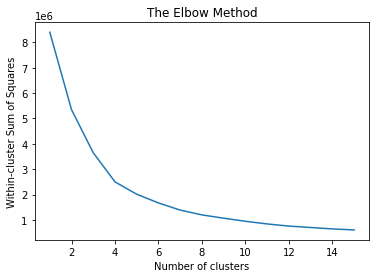

In [22]:
wcss = kmeansElbow(contract_2021, range(1,16))


number_clusters = range(1,16)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [30]:
model_2021 = KMeans(n_clusters=4)
labels = model_2021.fit_predict(contract_2021)
centroids = model_2021.cluster_centers_
centroids

array([[-1.22905342, -0.12674199],
       [ 3.62743208,  0.99865713],
       [-0.17748713,  2.39262543],
       [ 0.40833011, -1.04838278]])

In [31]:
contract_2021_labelled = pd.concat([contract_2021, pd.DataFrame(labels)], axis = 1)
contract_2021_labelled=contract_2021_labelled.rename(columns={0:"Label"})
contract_2021_labelled

,Component 1,Component 2,Label
0,4.617212,-0.367565,1
1,2.573389,2.518468,1
2,0.197569,-1.112822,3
3,2.849773,2.014423,1
4,0.287257,-1.109515,3
...,...,...,...
1903752,0.306154,-1.478789,3
1903753,-0.712099,-1.314828,3
1903754,0.007244,-0.799249,3
1903755,-0.001527,1.081780,2


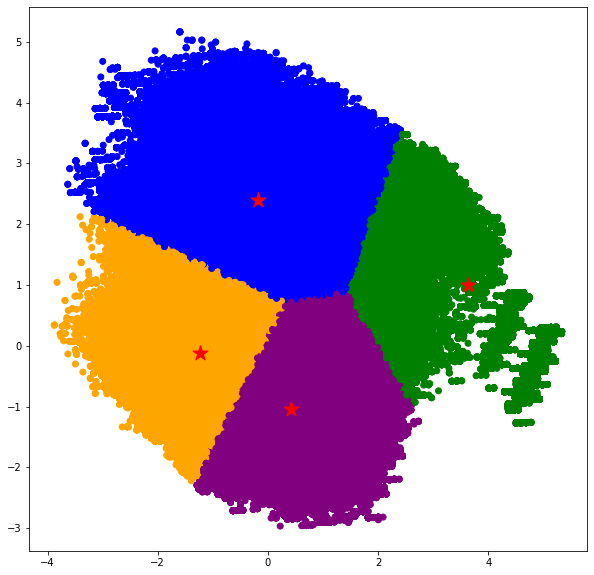

In [32]:
#Plot the labelled data
fig = plt.figure(figsize=(10,10))
colors = ['orange','green','blue','purple']
plt.scatter(contract_2021_labelled['Component 1'], contract_2021_labelled['Component 2'], c=contract_2021_labelled['Label'], cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
plt.show()